In [ ]:
import nltk
nltk.download('all')
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import feature_extraction
import random

In [ ]:
intents = [
    {
      "tag": "greeting",
      "patterns": [
        "Hi",
        "Hey",
        "How are you",
        "Is anyone there?",
        "Hello",
        "Good day"
      ],
      "responses": [
        "Hey :-)",
        "Hello, thanks for visiting",
        "Hi there, what can I do for you?",
        "Hi there, how can I help?"
      ]
    },
    {
      "tag": "goodbye",
      "patterns": ["Bye", "See you later", "Goodbye"],
      "responses": [
        "See you later, thanks for visiting",
        "Have a nice day",
        "Bye! Come back again soon."
      ]
    },
    {
      "tag": "thanks",
      "patterns": ["Thanks", "Thank you", "That's helpful", "Thank's a lot!"],
      "responses": ["Happy to help!", "Any time!", "My pleasure"]
    },
    {
      "tag": "items",
      "patterns": [
        "Which items do you have?",
        "What kinds of items are there?",
        "What do you sell?"
      ],
      "responses": [
        "We sell coffee and tea",
        "We have coffee and tea"
      ]
    },
    {
      "tag": "payments",
      "patterns": [
        "Do you take credit cards?",
        "Do you accept Mastercard?",
        "Can I pay with Paypal?",
        "Are you cash only?",
        "How can I pay?"
      ],
      "responses": [
        "We accept VISA, Mastercard and Paypal",
        "We accept most major credit cards, and Paypal"
      ]
    },
    {
      "tag": "delivery",
      "patterns": [
        "How long does delivery take?",
        "How long does shipping take?",
        "When do I get my delivery?",
        "How long I need wait?"
      ],
      "responses": [
        "Delivery takes 2-4 days",
        "Shipping takes 2-4 days"
      ]
    },
    {
      "tag": "funny",
      "patterns": [
        "Tell me a joke!",
        "Tell me something funny!",
        "Do you know a joke?"
      ],
      "responses": [
        "Why did the hipster burn his mouth? He drank the coffee before it was cool.",
        "What did the buffalo say when his son left for college? Bison."
      ]
    }
]

In [ ]:
X_train = []
y_train = []

for intent in intents:
    tag = intent['tag']
    for pattern in intent['patterns']:
        X_train.append(pattern)
        y_train.append(tag)

class StemmedCountVectorizer(feature_extraction.text.CountVectorizer):
    def build_analyzer(self):
        stemmer = nltk.stem.PorterStemmer()
        analyzer = super().build_analyzer()

        def stemming_step(doc):
            stemmed = [stemmer.stem(w) for w in analyzer(doc)]
            stemmed = [token for token in stemmed if re.match(r'\w+', token)] # Отфильтровываем знаки препинания
            return stemmed

        return stemming_step


vectorizer = StemmedCountVectorizer(lowercase=True, tokenizer=nltk.word_tokenize, stop_words=['the', 'a'])
vectorizer.fit(X_train) 

labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(list(set(y_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


LabelEncoder()

In [ ]:
vectorizer.get_feature_names()

['accept',
 'anyon',
 'are',
 'bye',
 'can',
 'card',
 'cash',
 'credit',
 'day',
 'deliveri',
 'do',
 'doe',
 'funni',
 'get',
 'good',
 'goodby',
 'have',
 'hello',
 'help',
 'hey',
 'hi',
 'how',
 'i',
 'is',
 'item',
 'joke',
 'kind',
 'know',
 'later',
 'long',
 'lot',
 'mastercard',
 'me',
 'my',
 'need',
 'of',
 'onli',
 'pay',
 'paypal',
 'see',
 'sell',
 'ship',
 'someth',
 'take',
 'tell',
 'thank',
 'that',
 'there',
 'wait',
 'what',
 'when',
 'which',
 'with',
 'you']

In [ ]:
X_train = vectorizer.transform(X_train)
y_train = labelEncoder.transform(y_train)

In [ ]:
print(y_train)

[3 3 3 3 3 3 2 2 2 6 6 6 6 4 4 4 5 5 5 5 5 0 0 0 0 1 1 1]


In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [ ]:
numOfClasses =len(labelEncoder.classes_)
numOfPatterns = (len(vectorizer.get_feature_names()),)
X_train = X_train.toarray()
y_train = to_categorical(y_train)

In [ ]:
model = Sequential()
model.add(Dense(15, input_shape = numOfPatterns, activation = 'relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(numOfClasses,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer ='adam', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 150, batch_size = 16)

Epoch 1/150
2/2 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.8214
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 0.5875 - accuracy: 0.8214
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.8214
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.8214
Epoch 5/150
2/2 [==============================] - 0s 8ms/step - loss: 0.5706 - accuracy: 0.8214
Epoch 6/150
2/2 [==============================] - 0s 6ms/step - loss: 0.5651 - accuracy: 0.8214
Epoch 7/150
2/2 [==============================] - 0s 6ms/step - loss: 0.5598 - accuracy: 0.8214
Epoch 8/150
2/2 [==============================] - 0s 8ms/step - loss: 0.5543 - accuracy: 0.8214
Epoch 9/150
2/2 [==============================] - 0s 5ms/step - loss: 0.5490 - accuracy: 0.8214
Epoch 10/150
2/2 [==============================] - 0s 4ms/step - loss: 0.5438 - accuracy: 0.8214
Epoch 11/150
2/2 [===========

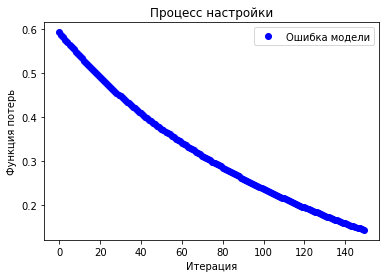

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label='Ошибка модели')
plt.title('Процесс настройки')
plt.xlabel('Итерация')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

In [ ]:
while True:
  request = input('> ')
  tag = labelEncoder.inverse_transform(
      [model.predict(vectorizer.transform([request])).argmax()])[0]
  possible_responses = [intent['responses'] for intent in intents if intent['tag'] == tag][0]
  print(random.choice(possible_responses))
  if tag == 'goodbye':
    break

> hello
Hi there, how can I help?
> What do you have ,
We have coffee and tea
> See you
Bye! Come back again soon.
